In [22]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
import glob,os.path,re
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기


In [23]:
# 각 파일 처리
def load_files(path):
    freqs = []
    results = []
    file_list = sorted(glob.glob(path))
    for fname in file_list: # 파일개수 : 20번 실행
        name = os.path.basename(fname)
        lang = name.split('-')[0] # en,en,en,en,en,fr,fr...
        
        with open(fname,'r',encoding='utf-8') as f:
            text = f.read()
        
        text = text.lower() # 소문자로 바꿔줌
        cnt = [0 for n in range(0,26)]
        code_a = ord('a')
        code_z = ord('z')
        
        # 모든 문자를 가져와서, a-z 사이의 문자만 저장
        for ch in text:
            n = ord(ch)
            if code_a <= n <= code_z:
                cnt[n-code_a] += 1  # b 98-97 = 1 1의 자리에 1 증가
        # 정규화 작업 - 각 피쳐마다 비율을 일정하게 맞춤.
        total = sum(cnt)
        # 데이터의 값이 0~1사이의 값으로 변환
        freq = list(map(lambda n: n/total,cnt))
        
        # data 값 저장
        freqs.append(freq)
        
        # 결과값 리스트 저장
        results.append(lang)
        
    return {'freqs':freqs,'results':results}

파일 확인

In [34]:
path = './lang/train/*.txt'
path2 = './lang/test/*.txt'

# 함수 호출 - train_input, train_target, test_input, test_target
data = load_files(path) # 함수호출 - 20개의 train 데이터를 가져옴.
test = load_files(path2) # 함수호출 - 8개의 test데이터를 가져옴
data['freqs'][0]
test['freqs'][0]
data['results'][0]



'en'

### 데이터 전처리 - train 세트, test 세트 생성

In [35]:
# 데이터 학습시키기
clf = svm.SVC()
clf.fit(data['freqs'],data['results'])

# 데이터 예측하기
predict = clf.predict(test['freqs'])
print('결과값 : ',predict)


결과값 :  ['en' 'en' 'fr' 'fr' 'id' 'id' 'tl' 'tl']


In [36]:
score = clf.score(test['freqs'],test['results'])
print('정답률 : ',score)

정답률 :  1.0


In [37]:
cl_report = metrics.classification_report(test['results'],predict)
print(cl_report)

              precision    recall  f1-score   support

          en       1.00      1.00      1.00         2
          fr       1.00      1.00      1.00         2
          id       1.00      1.00      1.00         2
          tl       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



array([<Axes: title={'center': 'en'}>, <Axes: title={'center': 'fr'}>,
       <Axes: title={'center': 'id'}>, <Axes: title={'center': 'tl'}>],
      dtype=object)

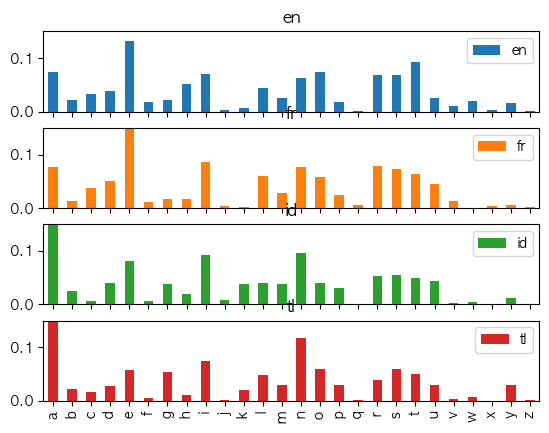

In [46]:
# 그래프 그리기
lang_dic = {}
for i,result in enumerate(data['results']):
    fq = data['freqs'][i] # data부분을 가지고 옴.
    if not (result in lang_dic):
        lang_dic[result] = fq
    for idx, v in enumerate(fq):
        lang_dic[result][idx] = (lang_dic[result][idx]+v) / 2
# x축의 눈금을 생성
asc_list = [chr(n) for n in range(97,122+1)] # 아스키코드 97:a, 122, z
df = pd.DataFrame(lang_dic,index=asc_list)
df.plot(kind='bar',subplots=True,ylim=(0,0.15))

(0.0, 0.15)

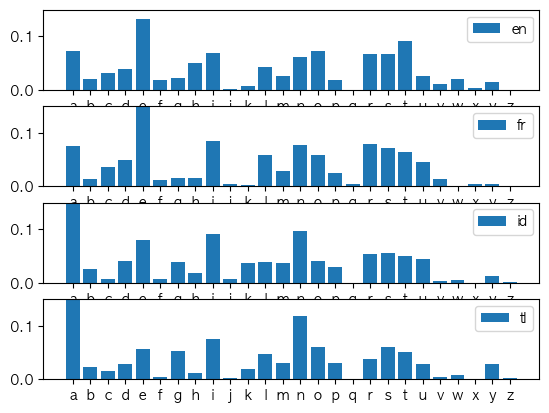

In [49]:
fig,axs = plt.subplots(4)
axs[0].bar(df.index,df['en'],label=df.columns[0])
axs[1].bar(df.index,df['fr'],label=df.columns[1])
axs[2].bar(df.index,df['id'],label=df.columns[2])
axs[3].bar(df.index,df['tl'],label=df.columns[3])
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
axs[0].set_ylim(0,0.15)
axs[1].set_ylim(0,0.15)
axs[2].set_ylim(0,0.15)
axs[3].set_ylim(0,0.15)

In [38]:
data['freqs'][19]

[0.20236947237911557,
 0.02273040363686458,
 0.0195619231299077,
 0.03705744592919135,
 0.06419617027138724,
 0.0057859209257473485,
 0.033062405289984845,
 0.006750241080038573,
 0.07549249207879873,
 0.00234192037470726,
 0.014740322358451578,
 0.0505579280892685,
 0.02383248381319741,
 0.11489185838269735,
 0.06764017082242733,
 0.03085824493731919,
 0.0017908802865408459,
 0.039399366303898606,
 0.06502273040363686,
 0.04614960738393718,
 0.027827524452403912,
 0.0048216007714561235,
 0.0057859209257473485,
 0.00041328006612481057,
 0.03388896542223447,
 0.0030307204849152774]